<a href="https://colab.research.google.com/github/LuisEduardoRB/EDP-II/blob/main/M%C3%A9todo_de_M%C3%ADnimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Método de Mínimos cuadrados para solucionar EDOs

Queremos aproximar la solución del problema de valores iniciales
$$u''(x)+u(x)=x,\qquad u(0)=0,\qquad u'(0)=2,$$
mediante una aproximación polinómica cúbica
$$u_N(x)=a_0+a_1x+a_2x^2+a_3x^3,$$
determinando los coeficientes por el **método de mínimos cuadrados** aplicado al **residuo de la ecuación diferencial**.

Este enfoque es totalmente análogo a lo que se hace en métodos de mínimos cuadrados para **Ecuaciones Diferenciales Parciales (EDP)**: se construye un residuo del operador diferencial y se minimiza algún funcional de error (normalmente una norma $L^2$).


## Bloque 1: importación de librerías

En el primer bloque se importan:

- `sympy` (`sp`): para cálculo simbólico, derivadas, integrales, solución de EDO, etc.
- `numpy` (`np`): para evaluación numérica eficiente sobre una malla de puntos.
- `matplotlib.pyplot` (`plt`): para graficar la solución exacta y la aproximación.

Esta combinación es la base típica para implementar prototipos de métodos numéricos tanto en EDO como en EDP.


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


## Bloque 2: aproximación cúbica y condiciones iniciales

En este bloque se define la aproximación y se incorporan las condiciones iniciales:

- `x=sp.symbols('x',real=True)` declara la variable simbólica $x$.
- `a0,a1,a2,a3=sp.symbols(...)` declara los coeficientes $a_0,a_1,a_2,a_3$ como incógnitas reales.
- `uN=a0+a1*x+a2*x**2+a3*x**3` define el polinomio cúbico $u_N(x)$.

Luego se imponen las condiciones iniciales:

- `uN.subs(x,0)` evalúa $u_N(0)$.
- `sp.diff(uN,x)` calcula $u_N'(x)$ y después se evalúa en $x=0$.
- Se forman las ecuaciones
  $$u_N(0)=0,\qquad u_N'(0)=2,$$
  y se resuelven para $a_0$ y $a_1$ con `sp.solve`.

Finalmente se sustituyen esos valores en $u_N(x)$, quedando una forma reducida:
$$u_N(x)=2x+a_2x^2+a_3x^3,$$
que ya cumple las condiciones iniciales.

En el contexto de EDP, este paso corresponde a incorporar las condiciones de frontera antes de construir el sistema de ecuaciones del método.


In [2]:
# 2 Variables simbólicas
x=sp.symbols('x',real=True)
a0,a1,a2,a3=sp.symbols('a0 a1 a2 a3',real=True)

#Aproximación cúbica u_N(x)=a0+a1*x+a2*x**2+a3*x**3
uN=a0+a1*x+a2*x**2+a3*x**3

# Imponer condiciones iniciales u(0)=0, u'(0)=2
eq_bc1=sp.Eq(uN.subs(x,0),0)
eq_bc2=sp.Eq(sp.diff(uN,x).subs(x,0),2)
sol_bc=sp.solve((eq_bc1,eq_bc2),(a0,a1))
uN=sp.simplify(uN.subs(sol_bc))

print("u_N(x) con condiciones iniciales:")
print(uN)


u_N(x) con condiciones iniciales:
x*(a2*x + a3*x**2 + 2)


## Bloque 3: residuo y funcional de mínimos cuadrados

Aquí se define el **residuo de la ecuación diferencial** y el funcional de mínimos cuadrados:

- `sp.diff(uN,x,2)` calcula $u_N''(x)$.
- `eps=sp.simplify(sp.diff(uN,x,2)+uN-x)` define
  $$\varepsilon(x)=u_N''(x)+u_N(x)-x,$$
  que es cuánto viola el polinomio $u_N$ la ecuación original.

El método de mínimos cuadrados consiste en minimizar
$$J(a_2,a_3)=\int_0^1\varepsilon(x)^2\,dx.$$

- `J=sp.integrate(eps**2,(x,0,1))` construye este funcional de error.
- `dJ_da2` y `dJ_da3` son las derivadas parciales de $J$ respecto a $a_2$ y $a_3$.
- Se resuelve el sistema
  $$\frac{\partial J}{\partial a_2}=0,\qquad \frac{\partial J}{\partial a_3}=0,$$
  para obtener los coeficientes óptimos $a_2^*,a_3^*$.

Después se sustituyen estos valores en $u_N(x)$ para obtener la aproximación final $u_N(x)$ por mínimos cuadrados.

En EDP la misma filosofía se aplica integrando el residuo al cuadrado sobre un dominio en 2D o 3D.


In [3]:
# 3. Residuo ε(x)=u_N''(x)+u_N(x)-x
eps=sp.simplify(sp.diff(uN,x,2)+uN-x)
print("\nResiduo ε(x):")
print(eps)

#Funcional de mínimos cuadrados J(a2,a3)=∫_0^1 ε(x)^2 dx
J=sp.integrate(eps**2,(x,0,1))
J_simpl=sp.simplify(J)
print("\nJ(a2,a3)=")
print(J_simpl)

# Derivadas de J y condiciones de óptimo
dJ_da2=sp.diff(J_simpl,a2)
dJ_da3=sp.diff(J_simpl,a3)

sol_params=sp.solve(
    (sp.Eq(dJ_da2,0),sp.Eq(dJ_da3,0)),
    (a2,a3),
    dict=True
)

print("\nSolución óptima (a2*,a3*):")
print(sol_params)

uN_ls=sp.simplify(uN.subs(sol_params[0]))
print("\nAproximación final u_N(x) por mínimos cuadrados:")
print(uN_ls)



Residuo ε(x):
a2*x**2 + 2*a2 + a3*x**3 + 6*a3*x + x

J(a2,a3)=
83*a2**2/15 + 49*a2*a3/3 + 5*a2/2 + 509*a3**2/35 + 22*a3/5 + 1/3

Solución óptima (a2*,a3*):
[{a2: -1335/86789, a3: -24759/173578}]

Aproximación final u_N(x) por mínimos cuadrados:
x*(-24759*x**2 - 2670*x + 347156)/173578


## Bloque 4: solución exacta de la EDO

Para evaluar qué tan buena es la aproximación, se calcula la solución exacta:

- `u=sp.Function('u')` declara la función $u(x)$.
- `ode=sp.Eq(sp.diff(u(x),x,2)+u(x),x)` representa la EDO $u''+u=x$.
- `sp.dsolve(...,ics={...})` resuelve simbólicamente la EDO con las condiciones iniciales $u(0)=0$, $u'(0)=2$.
- `u_exact` contiene la expresión cerrada de la solución exacta $u(x)$.

En muchos problemas de EDP no se tiene solución exacta, pero cuando existe ayuda a validar el método numérico.


In [4]:
# 4. Solución exacta de la EDO para comparar
u=sp.Function('u')
ode=sp.Eq(sp.diff(u(x),x,2)+u(x),x)
sol_exact=sp.dsolve(ode,ics={u(0):0,sp.diff(u(x),x).subs(x,0):2})
u_exact=sp.simplify(sol_exact.rhs)

print("\nSolución exacta u(x)=")
print(u_exact)



Solución exacta u(x)=
x + sin(x)


## Bloque 5: versión numérica y cálculo del error

En este bloque se comparan numéricamente la solución exacta y la aproximación:

- `sp.lambdify(x,uN_ls,"numpy")` convierte la expresión simbólica $u_N(x)$ en una función numérica que acepta arreglos de Numpy.
- Lo mismo se hace con `u_exact`.
- `np.linspace(0,1,400)` genera una malla uniforme de 400 puntos en $[0,1]$.
- Se calculan los valores aproximados y exactos en todos esos puntos.

El error se mide usando el **error cuadrático medio**:
$$\text{MSE}=\frac{1}{N}\sum_{i=1}^N\big(u_N(x_i)-u(x_i)\big)^2.$$

Esto da una medida global de qué tan bien el polinomio por mínimos cuadrados representa la solución real en el intervalo.


In [5]:
# 5. Versión numérica y cálculo del error
uN_num=sp.lambdify(x,uN_ls,"numpy")
u_exact_num=sp.lambdify(x,u_exact,"numpy")

x_vals=np.linspace(0,1,400)
y_aprox=uN_num(x_vals)
y_exact=u_exact_num(x_vals)

mse=np.mean((y_aprox-y_exact)**2)
print("\nError cuadrático medio en [0,1]:",mse)



Error cuadrático medio en [0,1]: 4.658653923853489e-07


# Bloque 6: gráfica de solución exacta vs aproximación

Por último se dibujan ambas curvas:

- Una curva para la solución exacta $u(x)$.
- Otra curva (línea punteada) para la aproximación $u_N(x)$ obtenida por mínimos cuadrados.

La gráfica permite ver visualmente cómo se comporta el método: en qué zonas el error es mayor, si la aproximación respeta las condiciones iniciales y cómo se ajusta a la dinámica impuesta por la ecuación diferencial.

Este tipo de comparación gráfica es estándar cuando se extienden estas ideas a EDP en varias variables.

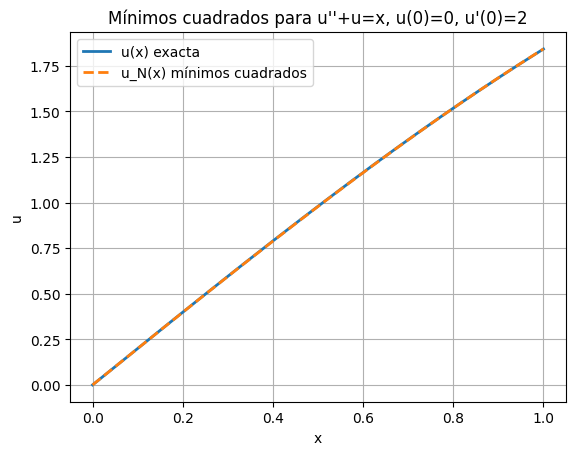

In [6]:
# 6. Gráfica: solución exacta vs aproximación por mínimos cuadrados
plt.plot(x_vals,y_exact,label="u(x) exacta",linewidth=2)
plt.plot(x_vals,y_aprox,"--",label="u_N(x) mínimos cuadrados",linewidth=2)
plt.xlabel("x")
plt.ylabel("u")
plt.title("Mínimos cuadrados para u''+u=x, u(0)=0, u'(0)=2")
plt.grid(True)
plt.legend()
plt.show()
